In [2]:

import os
import glob
import altair as alt
import pandas as pd
import numpy as np
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pathlib import Path
import os
import plotly
from tqdm import tqdm


pd.set_option('display.max_rows', 500)

In [45]:
team = "Chicago Bears"
team_city = "Chicago"
team_underscore = "_".join(team.lower().split(" "))

team_opp = "New York Jets"
team_opp_alt = team_opp
team_city_opp = "NY Jets"
team_opp_underscore = "_".join(team_opp.lower().split(" "))

team_date = "20221123"
player_date = "20221123"
nfl_date = "20221123"
# bears
# background etc.
primary_color = "#0B162A" 
secondary_color = "#C83803"

opp_primary_color = "#125740" 
opp_secondary_color = "#000000"

path_base = Path(os.getcwd()).parents[1]

print(path_base)

/home/jkonovsky/development/notebooks/chicago_bears_nerd


In [46]:
cols = ["Date", "Opponent", "Result", "W/L", "Div", "Spread", "Total", "Money"]
df_schedule = pd.read_csv(f"{path_base}/data/team_ranks/_nfl_team_{team_underscore}__{team_date}.csv")
df_schedule["Opponent"] = np.where(df_schedule.Location.eq("Away"), "@" + df_schedule.Opponent, df_schedule.Opponent)
record_str = df_schedule[~df_schedule.Div.isnull()].iloc[-1]["W/L"]

In [47]:
    df_schedule_opp

,Date,Opponent,Result,W/L,Div,Spread,Total,Money
0,09/11,Baltimore,L 9-24,0-1,0-0,6.5,Un 44.0,240
1,09/18,@Cleveland,W 31-30,1-1,0-0,6.0,Ov 38.5,205
2,09/25,Cincinnati,L 12-27,1-2,0-0,6.5,Un 46.0,220
3,10/02,@Pittsburgh,W 24-20,2-2,0-0,3.0,Ov 41.0,148
4,10/09,Miami,W 40-17,3-2,1-0,3.0,Ov 46.0,145
5,10/16,@Green Bay,W 27-10,4-2,1-0,7.5,Un 44.5,295
6,10/23,@Denver,W 16-9,5-2,1-0,-2.0,Un 37.0,-125
7,10/30,New England,L 17-22,5-3,1-1,3.0,Un 40.0,140
8,11/06,Buffalo,W 20-17,6-3,2-1,10.5,Un 46.0,430
9,11/20,@New England,L 3-10,6-4,2-2,3.5,Un 38.0,152


In [48]:
df_schedule = df_schedule.fillna("")
df_schedule = df_schedule.head(n=15)[cols]

df_schedule_opp = pd.read_csv(f"{path_base}/data/team_ranks/_nfl_team_{team_opp_underscore}__{team_date}.csv")
df_schedule_opp["Opponent"] = np.where(df_schedule_opp.Location.eq("Away"), "@" + df_schedule_opp.Opponent, df_schedule_opp.Opponent)
record_opp_str = df_schedule_opp[~df_schedule_opp.Div.isnull()].iloc[-1]["W/L"]

df_schedule_opp = df_schedule_opp.fillna("")
df_schedule_opp = df_schedule_opp.head(n=15)[cols]

In [49]:
file_path = f"{path_base}/data/team_ranks/_nfl_player_stat_*{team_date}.csv"
file_paths = glob.glob(os.path.join(file_path))

pds = list()
pbar = tqdm(file_paths)
for file_path in pbar:
    pbar.set_description(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
_df_player = pd.concat(pds)

/home/jkonovsky/development/notebooks/chicago_bears_nerd/data/team_ranks/_nfl_player_stat_scoring_total_points_20221123.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 487.39it/s]


In [50]:
_df_player.Team.unique()

array(['Tampa Bay Buccaneers', 'Atlanta Falcons', 'Cincinnati Bengals',
       'New England Patriots', 'Dallas Cowboys', 'Washington Commanders',
       'San Francisco 49ers', 'Denver Broncos', 'Buffalo Bills',
       'Baltimore Ravens', 'Arizona Cardinals', 'Houston Texans',
       'Indianapolis Colts', 'Philadelphia Eagles', 'Carolina Panthers',
       'Los Angeles Rams', 'Los Angeles Chargers', 'Minnesota Vikings',
       'New York Giants', 'New York Jets', 'Jacksonville Jaguars',
       'New Orleans Saints', 'Chicago Bears', 'Kansas City Chiefs',
       'Detroit Lions', 'Tennessee Titans', 'Las Vegas Raiders',
       'Green Bay Packers', 'Pittsburgh Steelers', 'Seattle Seahawks',
       'Cleveland Browns', 'Miami Dolphins'], dtype=object)

In [51]:
cols = ["Player", "Pos", "Rank", "Stat", "Value"]

player_stats_list = ["passing-gross-yards", "passing-touchdowns", "rushing-net-yards", "rushing-touchdowns", "defense-total-tackles", "defense-sacks"]
_df_player["_stat"] = _df_player.url.str.split("/", expand=True)[3]
_df_player["Stat"] = _df_player._stat.str.split("-").str.join(" ").str.title()
_df_player = _df_player[_df_player._stat.isin(player_stats_list)]
_df_player["Stat"] = _df_player.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Total", "")\
.str.replace("Defense", "")\
.str.replace("Gross", "")\
.str.replace("Net", "")
_df_player["Value"] = pd.to_numeric(_df_player.Value)
_df_player = _df_player[_df_player.Value.gt(0)]

df_player = _df_player[_df_player.Team.eq(team)][cols]
df_player_opp = _df_player[_df_player.Team.eq(team_opp)][cols]

In [52]:
file_path = f"{path_base}/data/team_ranks/_nfl_stat*{nfl_date}.csv"
file_paths = glob.glob(os.path.join(file_path))
pds = list()
pbar = tqdm(file_paths)
for file_path in pbar:
    pbar.set_description(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
df = pd.concat(pds)

/home/jkonovsky/development/notebooks/chicago_bears_nerd/data/team_ranks/_nfl_stat_opponent_penalties_per_play_20221123.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226/226 [00:00<00:00, 492.25it/s]


In [53]:
def_stats = {
    "opponent-points-per-game":.6,
    "opponent-points-per-play":1,
    "opponent-1st-half-points-per-game":1.5,
    "opponent-2nd-half-points-per-game":1.6,
    "opponent-rushing-touchdowns-per-game":1.7,
    "opponent-passing-touchdowns-per-game":1.8,
    "opponent-yards-per-game":1.85,
    "opponent-yards-per-play":1.9,
    "opponent-rushing-yards-per-game":2,
    "opponent-yards-per-rush-attempt":2.1,
    "opponent-passing-yards-per-game":2.6,
    "opponent-yards-per-pass-attempt":3,
    "defensive-points-per-game":4,
    "sacks-per-game":10,
    "interceptions-per-game":11,
    "opponent-fumbles-per-game":12,
    "opponent-red-zone-scores-per-game":13,
    "opponent-red-zone-scoring-pct":14,
    "opponent-seconds-per-play":15,
    "takeaways-per-game":16,
    "opponent-third-down-conversion-pct":17,
    }


stats = {
    "points-per-game":2,
    "points-per-play":3.5,
    "1st-half-points-per-game":3.9,
    "2nd-half-points-per-game":4,
    "rushing-touchdowns-per-game":4.1,
    "passing-touchdowns-per-game":4.2,
    "yards-per-game":4.5,
    "yards-per-play":4.8,
    "rushing-yards-per-game":4.9,
    "yards-per-rush-attempt":5,
    "rushing-play-pct":5.5,
    "passing-yards-per-game":5.6,
    "yards-per-pass-attempt":6,
    "passing-play-pct":7,
    "qb-sacked-per-game":10,
    "interceptions-thrown-per-game":11,
    "fumble-per-game":12,
    "penalties-per-game":13,
    "red-zone-scores-per-game":14,
    "red-zone-scoring-pct":15,
    "seconds-per-play":16,
    "giveaways-per-game":17,
    "third-down-conversion-pct":18,
    }

df["_stat"] = df.url.str.split("/", expand=True)[3]
df["Stat"] = df._stat.str.split("-").str.join(" ").str.title()
df["Stat"] = df.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Interceptions", "Int")

In [54]:
df.Team.unique()

array(['Arizona', 'Washington', 'Las Vegas', 'Jacksonville', 'Tampa Bay',
       'New Orleans', 'Chicago', 'Carolina', 'Indianapolis', 'Detroit',
       'Cleveland', 'Kansas City', 'NY Giants', 'Cincinnati',
       'Philadelphia', 'Seattle', 'Minnesota', 'Atlanta', 'Green Bay',
       'Dallas', 'Pittsburgh', 'Miami', 'New England', 'Denver',
       'Buffalo', 'San Francisco', 'NY Jets', 'Tennessee', 'Houston',
       'LA Chargers', 'LA Rams', 'Baltimore'], dtype=object)

In [55]:
def generate_off_def_df(dft, gstats=stats):
    dft["_order"] = dft._stat.map(gstats)
    dfp = dft[dft._stat.isin(gstats)]
    dfp_opp = dfp[dfp.Team.eq(team_city_opp)].sort_values("_order")
    dfp = dfp[dfp.Team.eq(team_city)].sort_values("_order")
    return dfp, dfp_opp

def generate_spider(df, primarycolor, plot_name, custom_data_columns=["2021", "2022"], visible=True):
    return go.Scatterpolar(
    r=df.Rank.tolist(),
    theta=df.Stat.tolist(),
    visible=visible,
    fill='toself',
    customdata=df[custom_data_columns],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primarycolor, font_size=16, font_color="#A5ACAF"),
    name=plot_name,
    marker=dict(color=primarycolor, size=10,line=dict(width=2))
)

def generate_table(df, header_color, background_color, sel_cols=["Stat", "Rank", "2022", "2021"], columnwidth=[.40, .2, .2, .2], visible=True):
    if sel_cols is not None:
        df = df[sel_cols]
    return go.Table(
        header=dict(values=df.columns, fill_color=header_color, font_color="white"), 
        columnwidth=columnwidth, visible=visible,
        cells=dict(values=df.T.values, fill_color=background_color, font_color="white", height=35, align=["left", "center"])
    )


In [56]:
df_plot_opp

,Unnamed: 0,Rank,Team,2022,Last 3,Last 1,Home,Away,2021,asof,url,_stat,Stat,_order


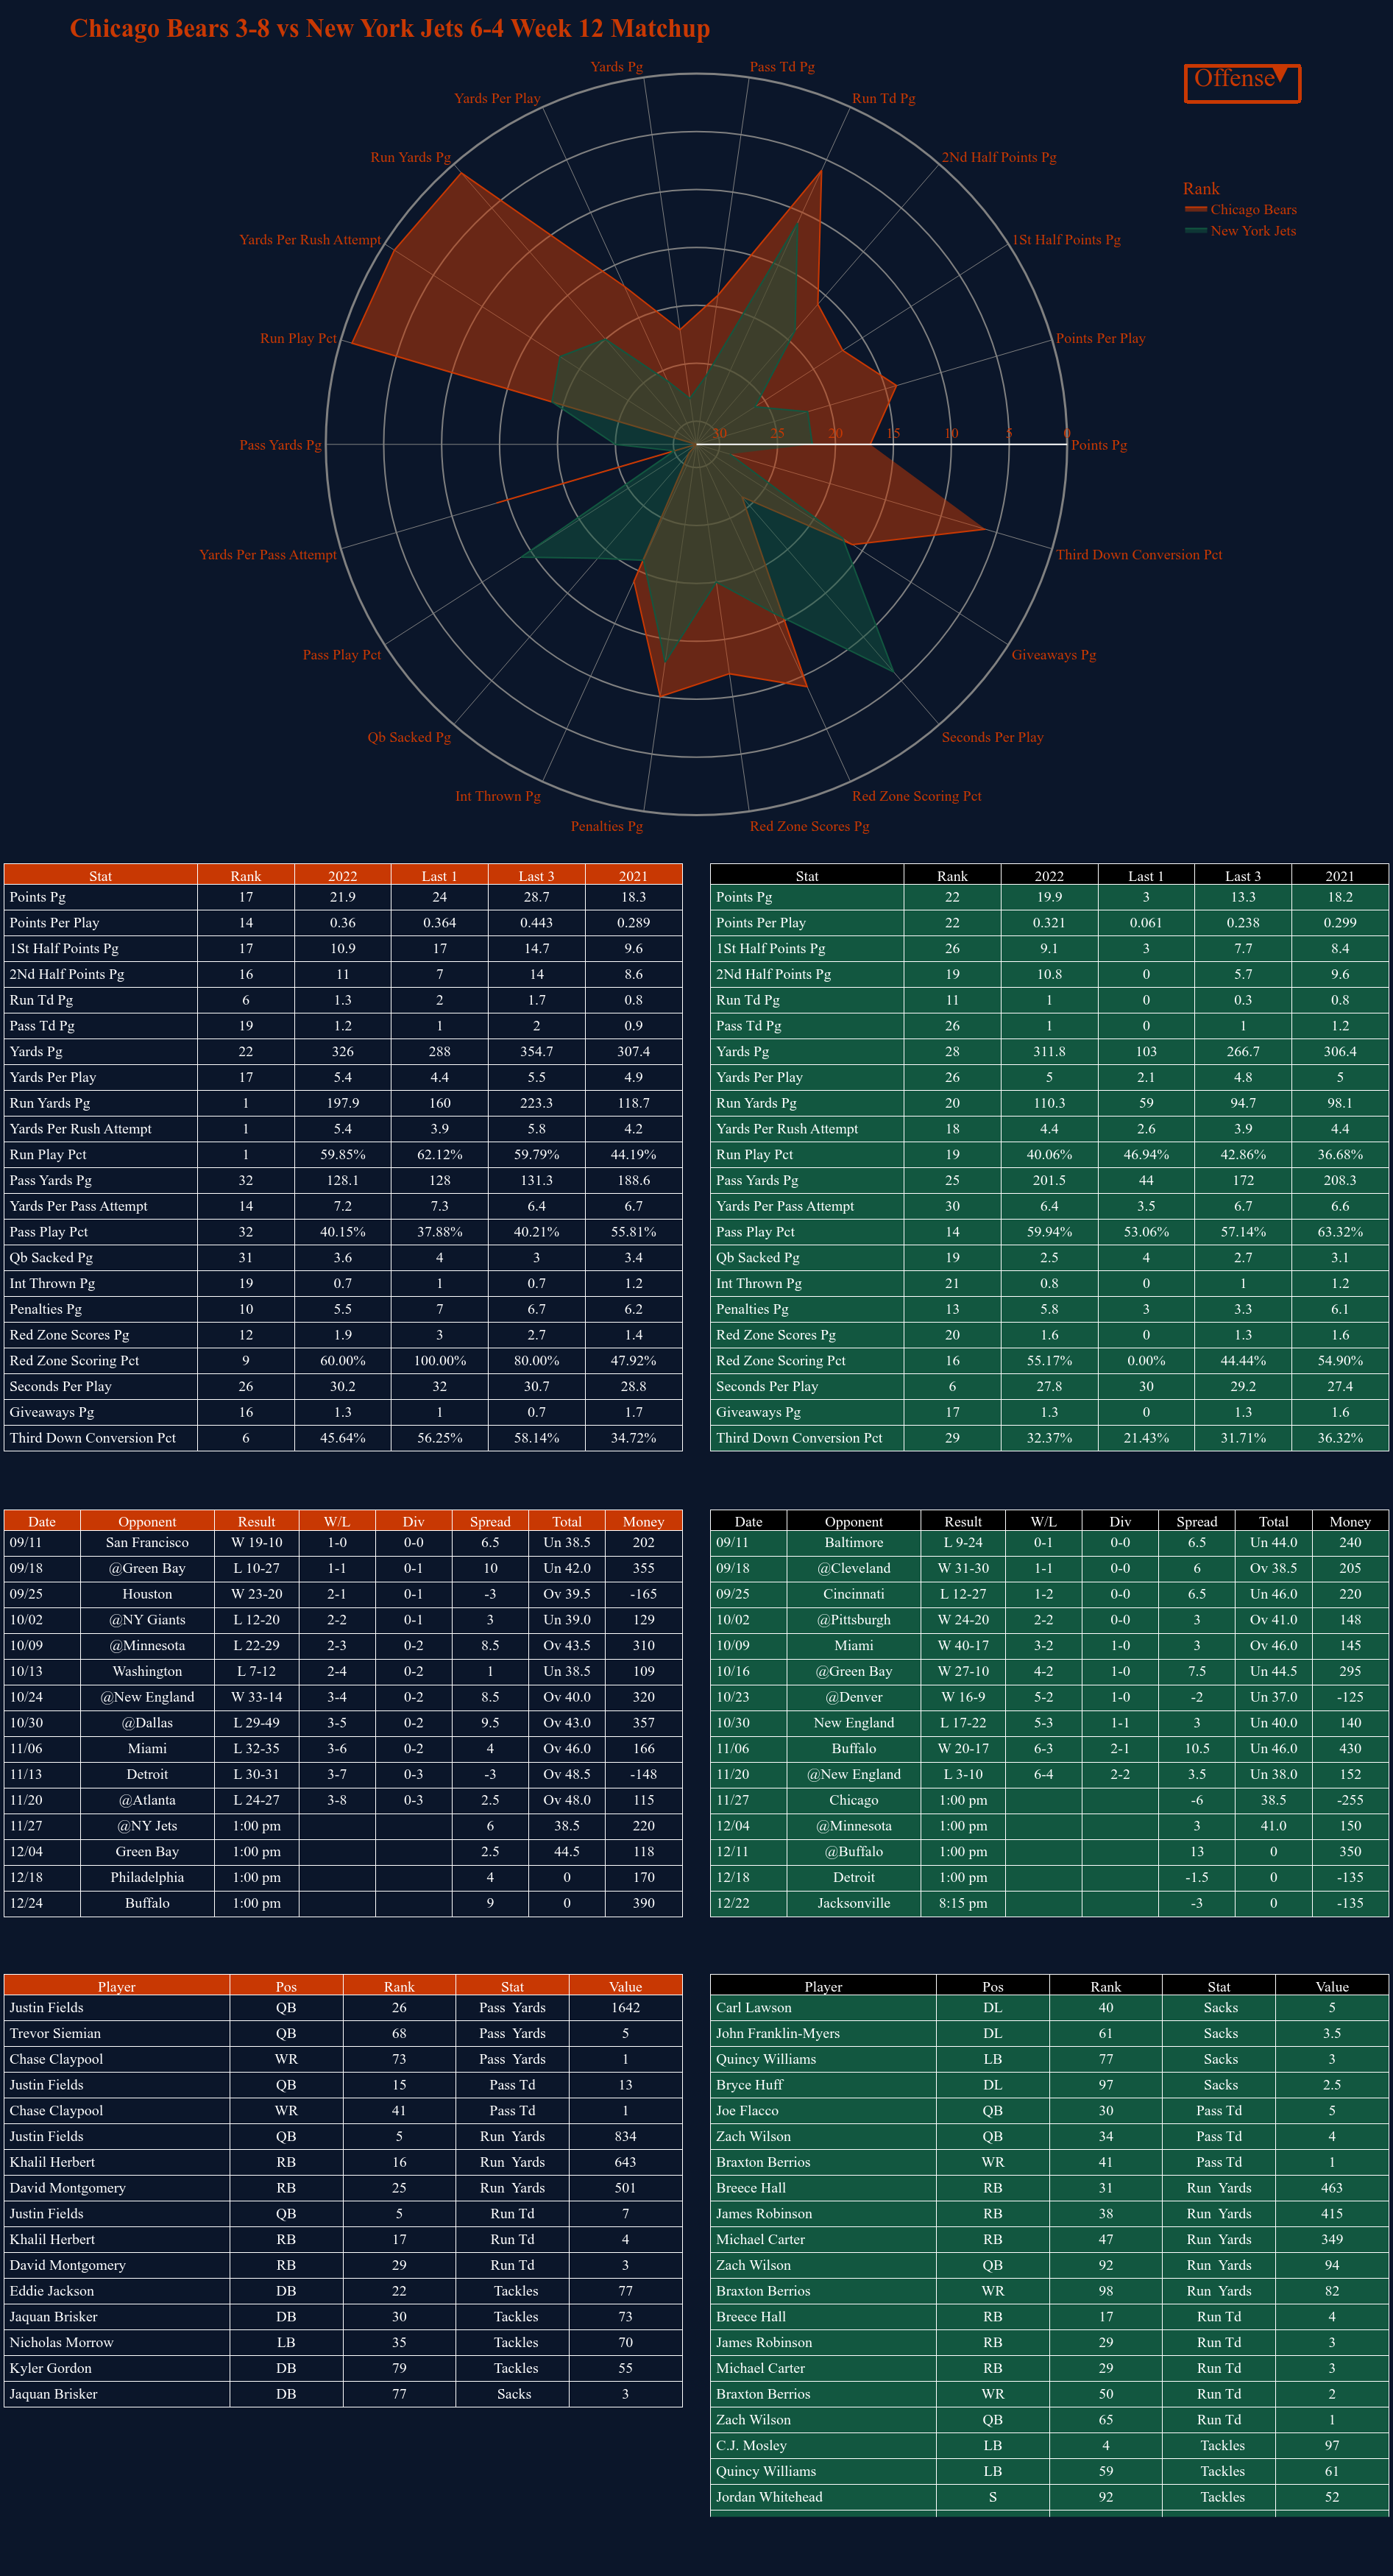

In [57]:
df_plot_def, df_plot_opp_def = generate_off_def_df(df, def_stats)
df_plot, df_plot_opp = generate_off_def_df(df, stats)
week = df_schedule[df_schedule.Opponent.str.contains(team_city_opp)].index.max()+1



fig = make_subplots(rows=4, cols=2, 
                    row_heights=[.41, .33, .23, .30], 
                    horizontal_spacing=.02, 
                    vertical_spacing=.02,
                    specs=[
                        [{"colspan": 2, "type":"scatterpolar"}, None],
                        [{"type":"table"}, {"type":"table"}],
                        [{"type":"table"}, {"type":"table"}],
                        [{"type":"table"}, {"type":"table"}],
                    ]
                   )

opp_color = opp_primary_color
sel_cols = ["Stat", "Rank", "2022", "Last 1", "Last 3", "2021"]

scat = generate_spider(df_plot, primarycolor=secondary_color, plot_name=team)
scat_opp = generate_spider(df_plot_opp, primarycolor=opp_primary_color, plot_name=team_opp)
scat_def = generate_spider(df_plot_def, primarycolor=secondary_color, plot_name=team, visible=False)
scat_opp_def = generate_spider(df_plot_opp_def, primarycolor=opp_primary_color, plot_name=team_opp, visible=False)

table = generate_table(df_plot, header_color=secondary_color, background_color=primary_color, sel_cols=sel_cols)
table_opp = generate_table(df_plot_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, sel_cols=sel_cols)

table_def = generate_table(df_plot_def,  header_color=secondary_color, background_color=primary_color, visible=False, sel_cols=sel_cols)
table_opp_def = generate_table(df_plot_opp_def,  header_color=opp_secondary_color, background_color=opp_primary_color, visible=False, sel_cols=sel_cols)

table_schedule = generate_table(df_schedule, header_color=secondary_color, background_color=primary_color, columnwidth=[.2, .35, .22, .2], sel_cols=None)
table_player = generate_table(df_player, header_color=secondary_color, background_color=primary_color, columnwidth=[.4, .2, .2, .2], sel_cols=None)

table_opp_schedule = generate_table(df_schedule_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, columnwidth=[.2, .35, .22, .2], sel_cols=None)
table_opp_player = generate_table(df_player_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, columnwidth=[.4, .2, .2, .2], sel_cols=None)



fig.add_trace(scat)
fig.add_trace(scat_opp)

fig.add_trace(scat_def)
fig.add_trace(scat_opp_def)

fig.add_trace(table, row=2, col=1)
fig.add_trace(table_opp, row=2, col=2)

fig.add_trace(table_def, row=2, col=1)
fig.add_trace(table_opp_def, row=2, col=2)


fig.add_trace(table_schedule, row=3, col=1)
fig.add_trace(table_player, row=4, col=1)

fig.add_trace(table_opp_schedule, row=3, col=2)
fig.add_trace(table_opp_player, row=4, col=2)


updatemenus = [{'buttons': [{'method': 'update',
  'label': 'Offense',
  'visible': True,
  'args': [{'visible': [True, True, False, False, True, True, False, False, True, True, True, True]}
          ]},
 {'method': 'update',
  'label': 'Defense',
  'visible': True,
  'args': [{'visible': [False, False, True, True, False, False, True, True, True, True, True, True], "execute":False}
          ]}
],
                'active':0,
                'direction': 'down',
                'showactive': False,
                "pad":{"r": 5, "t": 20},
                "xanchor":"left",
                "yanchor":"bottom",
                "x":.85,
                "y":.99,
                "font_size":35,
                "bgcolor":primary_color,
                "bordercolor":secondary_color,
                "borderwidth":5,
               }
]


fig.update_layout(
    title= f"<b>{team} {record_str} vs {team_opp} {record_opp_str} Week {week} Matchup </b>",
    font_family="Times New Roman",
    updatemenus=updatemenus,
    height=3500,
    margin=dict(
        l=5,
        r=5,
    ),
    showlegend=True,
    title_font_size=35,
    legend_title="Rank",
    font_size = 20,
    legend=dict(yanchor="top",y=0.96,xanchor="left", x=0.85),

    font=dict(color=secondary_color),
    polar = dict(
      bgcolor = primary_color,
      angularaxis = dict(linewidth = 3, showline=True, gridcolor = "grey", linecolor="grey"),
      radialaxis = dict(side = "counterclockwise", showline = True, linewidth = 2, gridcolor = "grey", gridwidth = 2, dtick=5, autorange="reversed"),        
    ),
    paper_bgcolor = primary_color
)

# dont think this works correctly
#fig.to_json("chart_foo.json")

plotly.io.write_json(fig, "chart_json/spider.json")
fig.show()